# Predictive Maintenance - Remaining Useful Life (RUL) Prediction  
### Exploratory Data Analysis (EDA)

Dataset: NASA C-MAPSS (FD001)

Objective: Analyze data to select relevant features for RUL prediction.

In [1]:
# Import required libraries for EDA

import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # Visualization

## Load Dataset

The FD001 dataset is loaded for analysis.

In [2]:
# Load FD001 dataset (training and testing)

# Loading the raw data from the 'data/raw' folder
train_df = pd.read_csv('../data/raw/train_FD001.txt', sep=' ', header=None)
test_df = pd.read_csv('../data/raw/test_FD001.txt', sep=' ', header=None)
rul_df = pd.read_csv('../data/raw/RUL_FD001.txt', sep=' ', header=None)

## Preview Training Data

Display the first rows of the training dataset to understand its structure.

In [3]:
# Display first rows of the training dataset

# Displaying the first rows of each dataset
print("Train dataset preview:")
display(train_df.head())

print("\nTest dataset preview:")
display(test_df.head())

print("\nRUL dataset preview:")
display(rul_df.head())

Train dataset preview:


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN



Test dataset preview:


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,NaN,NaN
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,NaN,NaN
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,NaN,NaN
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,NaN,NaN
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,NaN,NaN



RUL dataset preview:


,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


## Column Naming

The datasets do not have predefined column names. According to the C-MAPSS dataset documentation, we need to manually assign them.

We will name the columns as follows:
- `unit_number`: engine ID
- `time_in_cycles`: operational cycle
- `operational_setting_1, 2, 3`: operational settings
- `sensor_measurement_1` to `sensor_measurement_21`: sensor readings

In [4]:
# Removing empty columns at the end if they exist
train_df = train_df.dropna(axis=1, how='all')
test_df = test_df.dropna(axis=1, how='all')

# Defining column names according to the dataset documentation

column_names = ['unit_number', 'time_in_cycles', 
                'operational_setting_1', 'operational_setting_2', 'operational_setting_3'] + \
               [f'sensor_measurement_{i}' for i in range(1, 22)]

# Assigning column names to the datasets
train_df.columns = column_names
test_df.columns = column_names

# Displaying the first rows of the train dataset after renaming
train_df.head()


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


##  Exploratory Data Analysis (EDA): Dataset Overview
Quick overview of the datasets: shape, basic statistics, missing values.

In [5]:
# Quick dataset overview
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)

# Summary statistics for train dataset
train_df.describe().T

Train dataset shape: (20631, 26)
Test dataset shape: (13096, 26)


,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_in_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
operational_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
operational_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor_measurement_1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor_measurement_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor_measurement_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor_measurement_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor_measurement_5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


- No missing values detected.
- Some variables like `operational_setting_3` and sensors 1, 5, 10, 16, 18, and 19 are constant and bring no predictive value.
- High variability observed in `time_in_cycles` and several sensors such as 3, 4, 9, 14, 15, 17, 20, and 21 — these could be relevant for predictions.


## Removing Non-informative Features
Some features are constant or quasi-constant and provide no predictive value.

In [6]:
# Dropping constant or non-informative features
non_informative_features = [
    'operational_setting_3',
    'sensor_measurement_1',
    'sensor_measurement_5',
    'sensor_measurement_10',
    'sensor_measurement_16',
    'sensor_measurement_18',
    'sensor_measurement_19'
]

train_df = train_df.drop(columns=non_informative_features)
test_df = test_df.drop(columns=non_informative_features)

# Verifying the new shape
print(f'Train dataset shape after dropping: {train_df.shape}')
print(f'Test dataset shape after dropping: {test_df.shape}')

Train dataset shape after dropping: (20631, 19)
Test dataset shape after dropping: (13096, 19)


### Correlation Analysis
We now analyze feature correlations to identify redundant variables and multicollinearity risks.

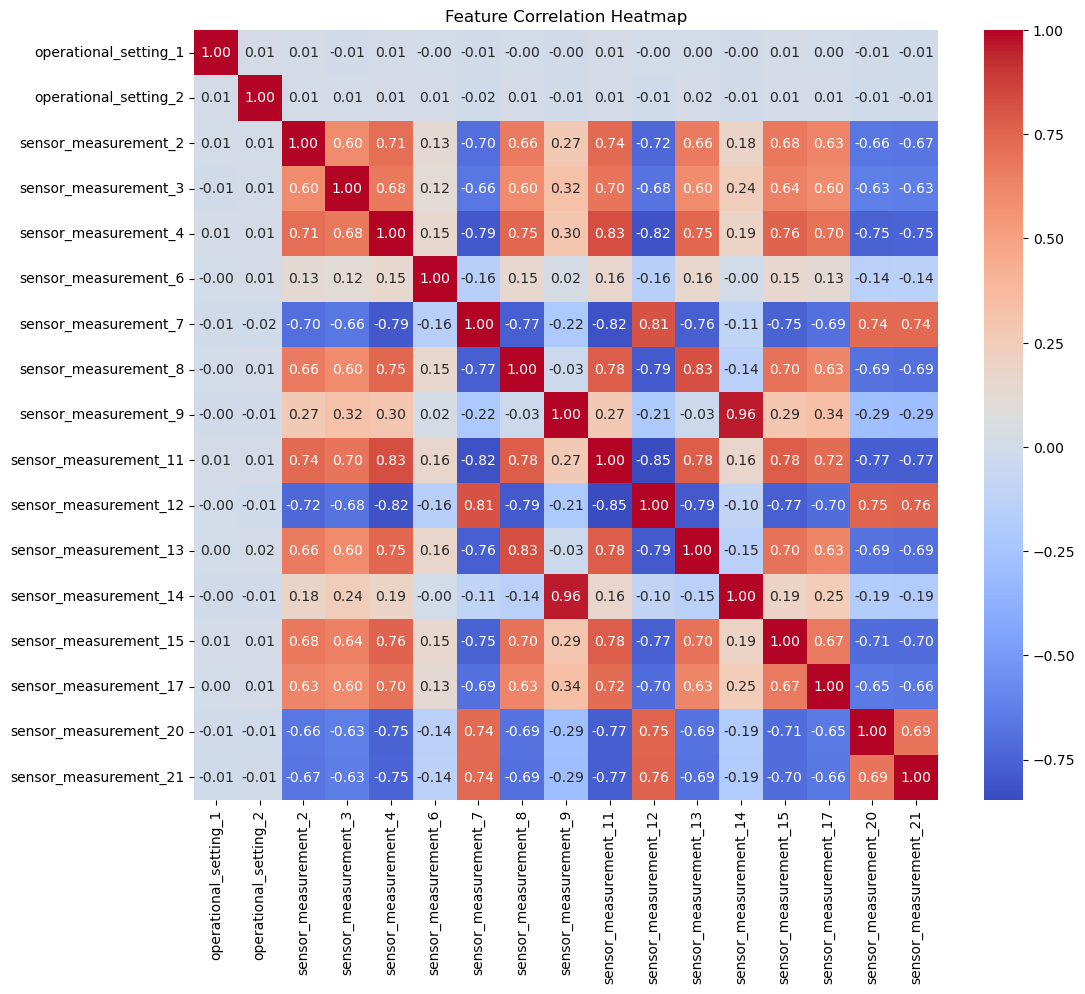

In [7]:
# Computing correlation matrix
corr_matrix = train_df.drop(columns=['unit_number', 'time_in_cycles']).corr()

# Displaying the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Some features are highly correlated:
- `sensor_measurement_9` and `sensor_measurement_14` (0.96)
- `sensor_measurement_8` and `sensor_measurement_13` (0.83)
- `sensor_measurement_4` and `sensor_measurement_11` (0.83)
- `sensor_measurement_7` and `sensor_measurement_12` (0.81)

These redundant features may introduce multicollinearity risks in modeling. 

## Remaining Useful Life (RUL) Dataset Shape

We clean the RUL dataset by dropping the empty column and renaming the target column.

In [8]:
# Dropping the empty column if exists
if rul_df.shape[1] > 1:
    rul_df = rul_df.drop(columns=[1])

# Renaming the column for clarity
rul_df.columns = ['RUL']

# Displaying dataset shape and first rows
print("RUL dataset shape after cleaning:", rul_df.shape)
rul_df.head()

RUL dataset shape after cleaning: (100, 1)


,RUL
0,112
1,98
2,69
3,82
4,91


## Compute Remaining Useful Life (RUL) for training data

For the training set, we compute the Remaining Useful Life (RUL) as the difference between the last cycle of each engine and the current cycle.

In [9]:
# Compute RUL for training set
rul_train = train_df.groupby('unit_number')['time_in_cycles'].max().reset_index()
rul_train.columns = ['unit_number', 'max_cycle']

# Merge with the training dataset
train_df = train_df.merge(rul_train, on='unit_number', how='left')
train_df['RUL'] = train_df['max_cycle'] - train_df['time_in_cycles']
train_df.drop(columns=['max_cycle'], inplace=True)

# Displaying the result
train_df[['unit_number', 'time_in_cycles', 'RUL']].head()

,unit_number,time_in_cycles,RUL
0,1,1,191
1,1,2,190
2,1,3,189
3,1,4,188
4,1,5,187


The RUL for the training set represents the remaining cycles before failure for each engine at every time step.

## Prepare the Test Dataset for Model Evaluation

In the test dataset, the provided RUL values correspond to the last recorded cycle of each engine unit.  
We will select the last cycle for each unit and merge it with the corresponding RUL value.  
This creates the final dataset for evaluating the model on unseen units.


In [11]:
# Select last cycle for each unit in the test dataset
test_last_cycle = test_df.groupby('unit_number').last().reset_index()

# Merge without sorting to preserve the original order
test_final = pd.concat([test_last_cycle.reset_index(drop=True), rul_df.reset_index(drop=True)], axis=1)
test_final.rename(columns={'RUL': 'true_RUL'}, inplace=True)

# Check the result
print(test_final.shape)
print(test_final['unit_number'].tolist())

(100, 20)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


## Save processed datasets

Save the final processed datasets for training and testing.

In [13]:
# Save the processed train dataset
train_df.to_csv('../data/processed/train_processed.csv', index=False)

# Save the processed test dataset
test_final.to_csv('../data/processed/test_processed.csv', index=False)

## Summary

We have prepared the CMAPSS dataset for predictive maintenance tasks:

- Loaded and cleaned the datasets.
- Removed constant and non-informative features.
- Computed the Remaining Useful Life (RUL) for the train dataset.
- Prepared the test dataset by keeping only the last cycle of each engine.
- Linked the test dataset with the true RUL values from `RUL_FD001.txt`.
- Saved the processed datasets for the next steps.

In this kind of RUL prediction project, the goal is to predict the remaining useful life at the last known cycle of each engine.

For the test set, the model will use:
- Sensor readings and operational settings at the last cycle of each engine.
- The target value: the true RUL from `RUL_FD001.txt`.

During evaluation, we will compare the model predictions with these 100 true RUL values from the test set.
Each row in the test set corresponds to the last available cycle of an engine.